In [ ]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.io.wavfile as wav
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/Bowel_Sound_Data/newdata.csv')

In [ ]:
df.head()

,sr,jitter,shimmer,pitch,hnr,zcr,mfcc,label
0,22050,0.017825,3.615654,301.72330,27.232807,0.009642,-35.699406,0
1,22050,0.039251,2.999469,306.31770,24.489889,0.004333,-35.151886,0
2,22050,0.036580,1.501361,155.15536,24.960632,0.003311,-35.011490,0
3,22050,0.022709,1.912195,381.37710,9.213717,0.005276,-32.480843,0
4,22050,0.058314,3.060950,211.59805,13.171637,0.001908,-13.123498,0


In [ ]:
df.describe()

,sr,jitter,shimmer,pitch,hnr,zcr,mfcc,label
count,653.0,653.000000,653.000000,482.000000,653.000000,653.000000,653.000000,653.000000
mean,22050.0,0.030740,2.272545,294.441783,22.928932,0.005651,-32.816886,0.370597
std,0.0,0.019714,1.628044,156.701050,7.482336,0.003849,5.912955,0.483335
min,22050.0,0.009575,0.605521,146.316020,-6.609686,0.000247,-47.427330,0.000000
25%,22050.0,0.021293,1.500618,185.143533,17.837881,0.003053,-36.099316,0.000000
50%,22050.0,0.026590,1.742447,227.659820,23.968647,0.004512,-33.259365,0.000000
75%,22050.0,0.034088,2.584494,384.676225,28.605690,0.007094,-29.517967,1.000000
max,22050.0,0.188138,15.297873,1711.962600,37.491672,0.023454,-8.360532,1.000000


In [ ]:
df.isnull().sum()

,0
sr,0
jitter,0
shimmer,0
pitch,171
hnr,0
zcr,0
mfcc,0
label,0


In [ ]:
df['pitch'].fillna(df['pitch'].median(),inplace=True)
df.isnull().sum()

<ipython-input-6-b5bb3ab92c3a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pitch'].fillna(df['pitch'].median(),inplace=True)


,0
sr,0
jitter,0
shimmer,0
pitch,0
hnr,0
zcr,0
mfcc,0
label,0


In [ ]:
df['label'].value_counts()

,count
label,
0,411
1,242


In [ ]:
df.shape

(653, 8)

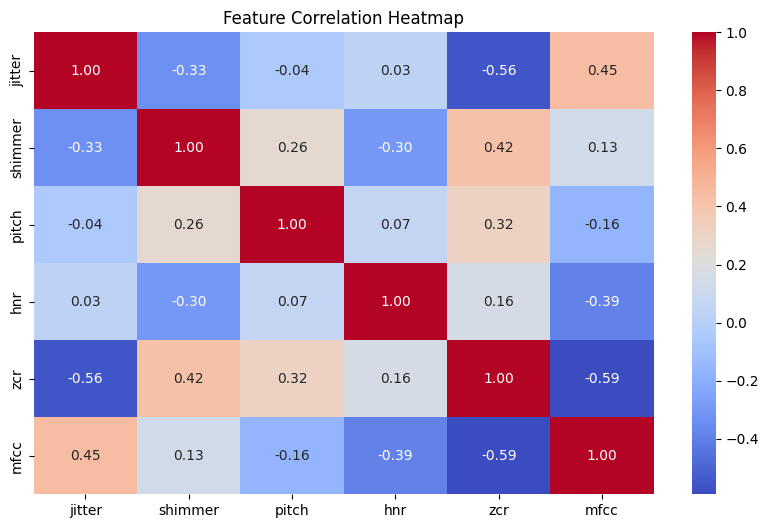

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['label', 'sr'], axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = df.drop(columns=['sr','zcr', 'label'], axis=1)
y=df['label']
X.head()

,jitter,shimmer,pitch,hnr,mfcc
0,0.017825,3.615654,301.72330,27.232807,-35.699406
1,0.039251,2.999469,306.31770,24.489889,-35.151886
2,0.036580,1.501361,155.15536,24.960632,-35.011490
3,0.022709,1.912195,381.37710,9.213717,-32.480843
4,0.058314,3.060950,211.59805,13.171637,-13.123498


In [ ]:

scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)

In [ ]:
X=standardized_data
Y=df['label']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y,random_state=1)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(457, 5) (196, 5) (457,) (196,)


In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)
precision_train = precision_score(X_train_prediction, Y_train)
print("Precision:", precision_train)

Accuracy score of the training data :  0.7417943107221007
Precision: 0.3431952662721893


In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

precision_test = precision_score(X_test_prediction, Y_test)
print("Precsion:", precision_test)

Accuracy score of the test data :  0.7448979591836735
Precsion: 0.3287671232876712


Accuracy: 0.7427258805513017
Precsion: 0.33884297520661155


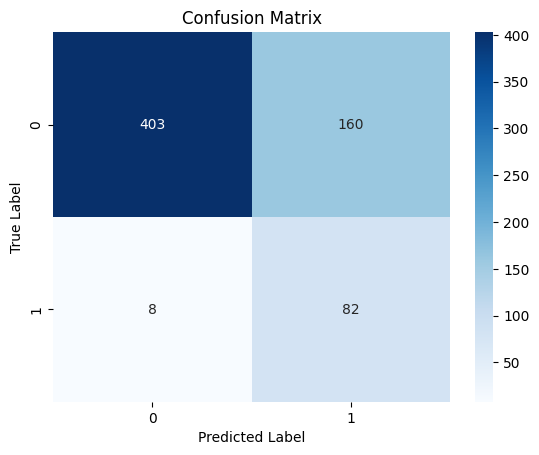

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
X_pred= classifier.predict(X)
accuracy = accuracy_score(X_pred, Y)
print("Accuracy:", accuracy)

precision_test = precision_score(X_pred, Y)
print("Precsion:", precision_test)

cm = confusion_matrix(X_pred, Y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()